In [5]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

Saving image to: image_processed/moon_filtered.png


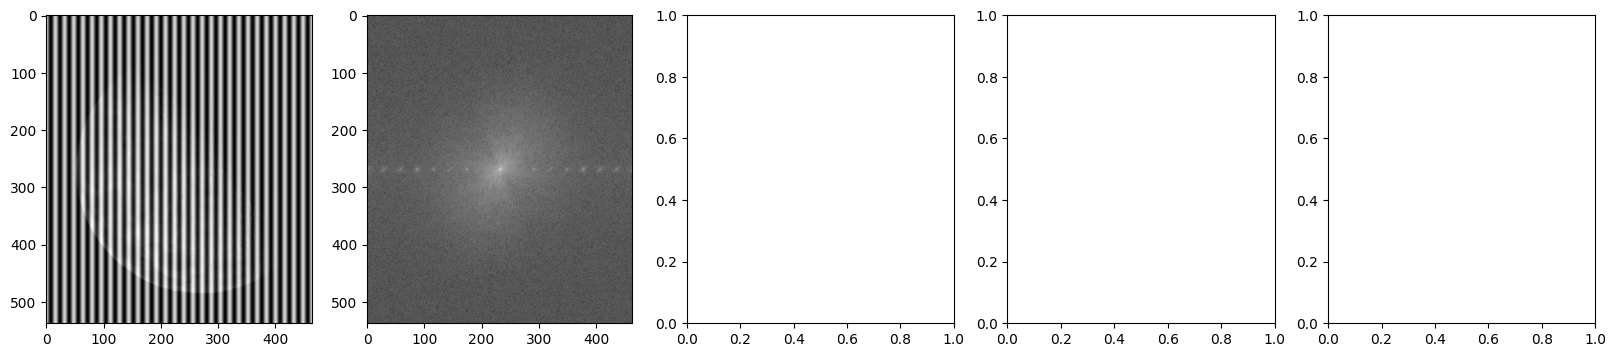

In [6]:
def butter_worth_low_pass(distance_from_center, cutoff_frequency, order):
    return 1 / (1 + (distance_from_center / cutoff_frequency) ** (2 * order))



if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)
    

    
    ### START YOUR CODE HERE ### (You can change anything inside this block)    
    
    fft = np.fft.fft2(im)
    fft_shift = np.fft.fftshift(fft)
    

    
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 5, 1)
    plt.imshow(im, cmap="gray")
    plt.subplot(1, 5, 2)
    plt.imshow(np.log(np.abs(fft_shift)), cmap="gray")
    plt.subplot(1, 5, 3)
    plt.subplot(1, 5, 4)
    plt.subplot(1, 5, 5)
    
    
    
    
    
    
    
    

    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(np.log(np.abs(fft_shift))))